In [1]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
DateFormat = "%Y-%m-%d"
today = datetime.now().strftime(DateFormat)
today

'2021-02-09'

In [11]:
# get number of days earlier
hqDays = 120
startDate = (datetime.now() + timedelta(days=-hqDays)).strftime(DateFormat)
startDate

'2020-10-12'

In [12]:
# download hq data
symbol = 'WATT'
df = web.DataReader(symbol, data_source="yahoo", start=startDate, end=today)

In [ ]:
#df.reindex(datetime.strptime(df.index, DateFormat))
#df.index

In [13]:
# add columns from 1 day earlier row
df['PrvClose'] = df.Close.shift(1)
df['PrvLow'] = df.Low.shift(1)
#df['LowSlope'] = df.Low - df.PrvLow
df['LowSlope'] = (df.Low - df.PrvLow) / df.PrvClose
df.tail(3)

,High,Low,Open,Close,Volume,Adj Close,PrvClose,PrvLow,LowSlope
Date,,,,,,,,,
2021-02-05,3.93,3.69,3.89,3.79,3116300,3.79,3.85,3.462,0.059221
2021-02-08,4.90,3.83,3.98,4.33,15148400,4.33,3.79,3.690,0.036939
2021-02-09,4.75,4.13,4.35,4.49,5034855,4.49,4.33,3.830,0.069284


In [ ]:
# pandas built-in plot
#df.LowSlope.plot()

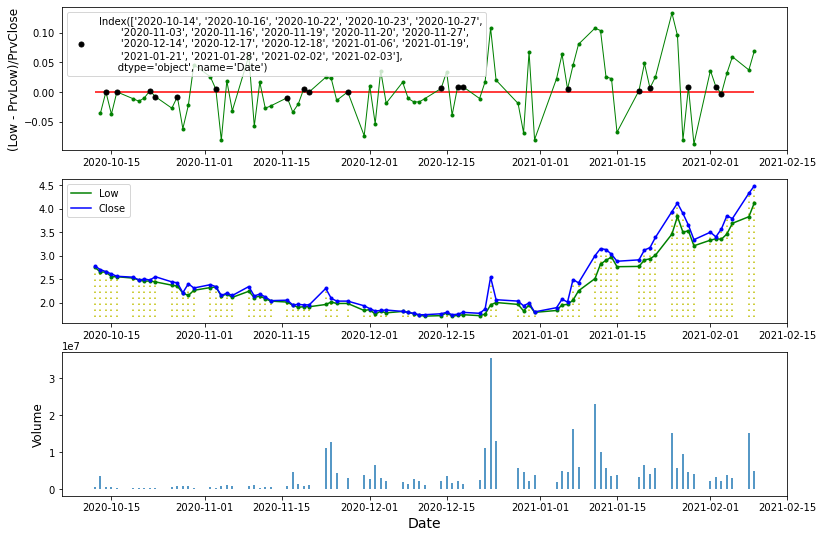

In [17]:
plt.figure(figsize=[13, 9]) # width and height in inches
plt.title('Low Slope Distribution', fontsize=18)

plt.subplot(311)
#plt.plot(range(df.shape[0]), df.LowSlope, 'g', linewidth=1)
#plt.hlines(0, 0, df.shape[0], colors='r')
plt.plot(df.LowSlope, color='g', linewidth=1)
plt.plot(df.LowSlope, 'go', markersize=3)
plt.hlines(0, df.index[0], df.index[df.shape[0]-1], colors='r')

#markerData = df.LowSlope[df.LowSlope.isin([0])] # marker where slope = 0
markerData = df.LowSlope[abs(df.LowSlope) < 0.01] # less than 1%
plt.plot(markerData, 'ko', markersize=5, label="%s" % markerData.index.strftime(DateFormat))
plt.legend(loc='upper left')
plt.ylabel('(Low - PrvLow)/PrvClose', fontsize=12)

plt.subplot(312)
plt.plot(df.Low, color='g', label="Low")
plt.plot(df.Low, 'go', markersize=3)
plt.plot(df.Close, color='b', label="Close")
plt.plot(df.Close, 'bo', markersize=3)
plt.vlines(df.index, 1.7, df.Close, color="y", linestyle=(0, (1, 3)))#'dotted'
plt.legend(loc="upper left")
          
plt.subplot(313)
plt.vlines(df.index, 1000, df.Volume)
plt.ylabel('Volume', fontsize=12)

plt.xlabel('Date', fontsize=14)
plt.show()

### * The tallest bar in Volume
### * There were two volume spikes on 2020-11-23 and 2020-12-22/2020
### * Daily volume is low, price  before 2020-11-15 

In [ ]:
df.LowSlope[abs(df.LowSlope) <= 0.01]